In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}
df = pd.DataFrame(data)
df.head()

,a1,a2,a3,Classification
0,True,Hot,High,No
1,True,Hot,High,No
2,False,Hot,High,Yes
3,False,Cool,Normal,Yes
4,False,Cool,Normal,Yes


In [9]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,a1,a2,a3,Classification
0,1,1,0,0
1,1,1,0,0
2,0,1,0,1
3,0,0,1,1
4,0,0,1,1


In [10]:
label_encoders

{'a1': LabelEncoder(),
 'a2': LabelEncoder(),
 'a3': LabelEncoder(),
 'Classification': LabelEncoder()}

In [4]:
X = df.drop('Classification', axis=1)
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [6]:
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



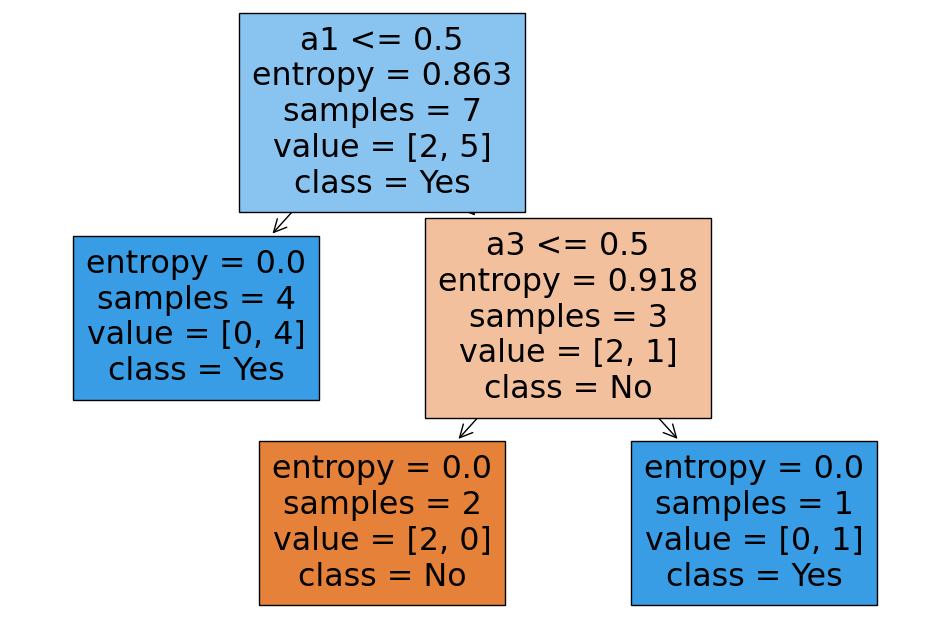

In [8]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()